In [1]:
import pandas as pd

red_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/winequality-red.csv'
white_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/winequality-white.csv'

red_wine = pd.read_csv(red_url, sep=';')
white_wine = pd.read_csv(white_url, sep=';')

red_wine['color'] = 1
white_wine['color'] = 0

wine = pd.concat([red_wine, white_wine])

wine['taste'] = [1.0 if grade > 5 else 0.0 for grade in wine['quality']]

X = wine.drop(['taste', 'quality'], axis=1) # feature
y = wine['taste'] # label

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

wine_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
wine_tree.fit(X_train, y_train)

y_pred_tr = wine_tree.predict(X_train)
y_pred_test = wine_tree.predict(X_test)

print('Train ACC = ', accuracy_score(y_train, y_pred_tr))
print('Train ACC = ', accuracy_score(y_test, y_pred_test))

Train ACC =  0.7294593034442948
Train ACC =  0.7161538461538461


In [4]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, roc_curve)

print('accuracy :', accuracy_score(y_test, y_pred_test))
print('recall :', recall_score(y_test, y_pred_test))
print('precision :', precision_score(y_test, y_pred_test))
print('auc score :', roc_auc_score(y_test, y_pred_test))
print('f1 score :', f1_score(y_test, y_pred_test))

accuracy : 0.7161538461538461
recall : 0.7314702308626975
precision : 0.8026666666666666
auc score : 0.7105988470875331
f1 score : 0.7654164017800381


### ROC 커브 거리기

In [6]:
wine_tree.predict_proba(X_test)
# predict_proba() : 예측된 값이 속성(여기선 taste의 0 or 1)들 중 얼마나 비중을 차지하는지 보여주는 함수
# ['0'일 확률, '1'일 확률]

array([[0.61602594, 0.38397406],
       [0.61602594, 0.38397406],
       [0.12197802, 0.87802198],
       ...,
       [0.12197802, 0.87802198],
       [0.61602594, 0.38397406],
       [0.12197802, 0.87802198]])

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

pred_proba = wine_tree.predict_proba(X_test)[:, 1]
                    #.predict_proba(X_test)[:, 1] : 여기선 taste의 '1'일 확률들만의 값으로 가져온다는 설정
fpr, tpr, thresholds = roc_curve(y_test, pred_proba)
# fpr = fall-out, tpr = recall

In [17]:
fpr

array([0.        , 0.14884696, 0.25366876, 0.31027254, 1.        ])

In [18]:
tpr

array([0.        , 0.45078979, 0.65492102, 0.73147023, 1.        ])

In [19]:
thresholds

array([       inf, 0.87802198, 0.72692794, 0.67447307, 0.38397406])

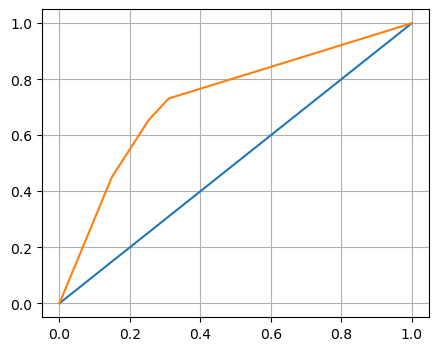

In [20]:
plt.figure(figsize=(5, 4))
plt.plot([0, 1], [0, 1])
# plt.plot([0, 1], [0, 1]) : X축과 Y축 값이 모두 0부터 1까지인 대각선
plt.plot(fpr, tpr)
plt.grid()
plt.show()